In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from planet import *
from fastai.conv_learner import *

## below is just utils skip it when you are running it

In [3]:
class48 = pd.read_csv('/home/hongpengfei_emrys/pengfei/data/48_classes.csv')

In [40]:
print(class48.head())
len(class48)

   Unnamed: 0    classes
0           0  /m/01g317
1           1   /m/09j2d
2           2   /m/04yx4
3           3   /m/0dzct
4           4   /m/07j7r


48

In [41]:
training48 = pd.read_csv('/home/hongpengfei_emrys/pengfei/data/training_48_more.csv')

In [42]:
training48.head()

,ImageID,labels
0,a4fe7671ea5ed6af,/m/01g317 /m/0cgh4
1,b26f5ae6ca1f2670,/m/07j7r
2,5eec09381327a8e6,/m/01g317 /m/02p0tk3 /m/04hgtk /m/04rky /m/04y...
3,2d3b1e5117ab2059,/m/015p6
4,bc6bb162380acc38,/m/01prls /m/07yv9 /m/0d4v4


In [43]:
path = Path('/home/hongpengfei_emrys/pengfei/data/256/')

In [44]:
# clear data that is not in the training image folder
image_names = os.listdir(path)
image_names = [o.split('.')[0] for o in image_names]
print(len(image_names))
print(len(training48))
imageID = list(training48.ImageID)
print(imageID[0])
print(len(imageID))

18798
25904
a4fe7671ea5ed6af
25904


In [56]:
count=0
error=0
for ID in imageID:
    if ID not in image_names:
        try:
            count+=1
            training48.drop(imageID.index(ID), inplace=True)
        except Exception as e:
            error+=1

In [57]:
count, error

(7106, 0)

In [58]:
len(training48)

18798

In [73]:
# rize image to 256
for n in image_names:
    img = Image.open(path/str(n+'.jpg'))
    if img.size != (256, 256):
        count += 1
        img = img.resize((256,256), Image.ANTIALIAS)
        img.save(path/str(n+'.jpg'))

In [44]:
train48 = pd.read_csv('/home/hongpengfei_emrys/pengfei/data/training_48.csv')

In [45]:
train48.head()

,ImageID,labels
0,a4fe7671ea5ed6af,/m/01g317 /m/0cgh4
1,b26f5ae6ca1f2670,/m/07j7r
2,2d3b1e5117ab2059,/m/015p6
3,bc6bb162380acc38,/m/01prls /m/07yv9 /m/0d4v4
4,c4965b0f9a9f89c7,/m/019jd /m/01rzcn /m/03jm5 /m/07j7r /m/07yv9 ...


In [42]:
train48.drop(['Unnamed: 0'], axis=1, inplace=True)

In [46]:
# write back
train48.to_csv('/home/hongpengfei_emrys/pengfei/data/training_48.csv', index=False)

## the end of utils

## load data

In [3]:
PATH = Path('/home/hongpengfei_emrys/pengfei/data/')

In [4]:
train48 = pd.read_csv('/home/hongpengfei_emrys/pengfei/data/training_48.csv')

In [5]:
metricss = [f2]
f_model = resnet34

In [6]:
label_csv = PATH/'training_48.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [7]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    return ImageClassifierData.from_csv(PATH, '256', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='test_256')

In [8]:
?? ImageClassifierData

In [9]:
data = get_data(256)

In [18]:
x,y = next(iter(data.val_dl))

In [19]:
data.classes[0], len(data.classes)

('/m/015p6', 48)

In [20]:
# for the first picture
list(zip(data.classes, y[0]))

[('/m/015p6', 0.0),
 ('/m/019jd', 0.0),
 ('/m/019nj4', 0.0),
 ('/m/01bl7v', 0.0),
 ('/m/01bqvp', 0.0),
 ('/m/01d40f', 0.0),
 ('/m/01g317', 1.0),
 ('/m/01lrl', 0.0),
 ('/m/01mzpv', 0.0),
 ('/m/01prls', 0.0),
 ('/m/01rzcn', 0.0),
 ('/m/01xyhv', 0.0),
 ('/m/0271t', 0.0),
 ('/m/02p0tk3', 0.0),
 ('/m/02wbm', 0.0),
 ('/m/03bt1vf', 0.0),
 ('/m/03jm5', 0.0),
 ('/m/03q69', 0.0),
 ('/m/0463sg', 0.0),
 ('/m/04bcr3', 0.0),
 ('/m/04hgtk', 0.0),
 ('/m/04rky', 0.0),
 ('/m/04szw', 0.0),
 ('/m/04yx4', 0.0),
 ('/m/05r655', 0.0),
 ('/m/05s2s', 0.0),
 ('/m/05y5lj', 0.0),
 ('/m/079cl', 0.0),
 ('/m/07j7r', 0.0),
 ('/m/07yv9', 0.0),
 ('/m/0838f', 0.0),
 ('/m/083wq', 0.0),
 ('/m/08dz3q', 0.0),
 ('/m/09j2d', 0.0),
 ('/m/09j5n', 0.0),
 ('/m/0c9ph5', 0.0),
 ('/m/0c_jw', 0.0),
 ('/m/0cgh4', 1.0),
 ('/m/0csby', 0.0),
 ('/m/0d4v4', 0.0),
 ('/m/0dzct', 0.0),
 ('/m/0dzf4', 0.0),
 ('/m/0fly7', 0.0),
 ('/m/0h9mv', 0.0),
 ('/m/0jbk', 0.0),
 ('/m/0jyfg', 0.0),
 ('/m/0k0pj', 0.0),
 ('/m/0k4j', 0.0)]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


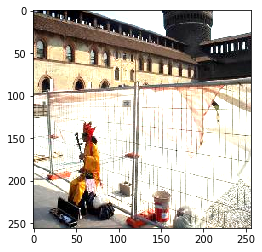

In [21]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4)

In [10]:
learn = ConvLearner.pretrained(f_model, data, metrics=metricss)

In [11]:
learn

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d

In [ ]:
lrf = learn.lr_find()
learn.sched.plot()

In [24]:
lr = 1
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                          
    0      0.161305   0.136539   0.706071  
    1      0.151603   0.131886   0.716152                    
    2      0.141741   0.129519   0.726872                    


[array([0.12952]), 0.7268717405756532]

In [25]:
learn.save('model0')

In [28]:
learn.load('model0')

In [27]:
# learn.unfreeze()
# learn.fit(lr/2, 1, cycle_len=1)

epoch      trn_loss   val_loss   f2                          
    0      0.155299   0.136965   0.704523  


[array([0.13697]), 0.7045227368127911]

In [42]:
multi_preds, y = learn.TTA(is_test=True)
preds = np.mean(multi_preds, 0)

In [43]:
len(preds)

32536

In [44]:
test_fnames = read_dir(PATH, 'test_256')

In [57]:
preds_filter = np.round(preds)

In [64]:
def extract_id (name):
    output = name.split("/")[-1].split(".")[0]
    return output

In [67]:
submit = {}
for i, pred in enumerate(preds_filter):
    id_ = extract_id(test_fnames[i])
    label = ""
    for num, j in enumerate(pred):
        if j == 1:
            label += data.classes[num]
            label += " "
    label = label[:-1]
    submit[id_] = label

In [70]:
len(submit.keys())

32536

In [69]:
training = pd.DataFrame.from_dict(submit,orient='index')
training.index.names = ['image_id']
training.columns = ['labels']
training.to_csv("test_1.csv")